In [2]:
!pip3 install tensorflow --user 
!pip3 install keras --user 
!pip install -U scikit-learn
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image 
from sklearn.model_selection import LeaveOneOut, KFold

path=os.getcwd()
print(path)

/home/alixntm/Notebooks


In [4]:
dataset_path='/home/alixntm/msc/ia.data/chest_Xray/'
test_set=dataset_path+'test/'
train_set=dataset_path+'train/'
val_set=dataset_path+'val/'

In [5]:
def make_dataset(data_path, n_splits):
    def gen():
        for train_index, test_index in KFold(n_splits).split(X_data):
            x_train, x_test=X_data[train_index],X_data[test_]


Found 624 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
(32, 256, 256, 3)
(32,)


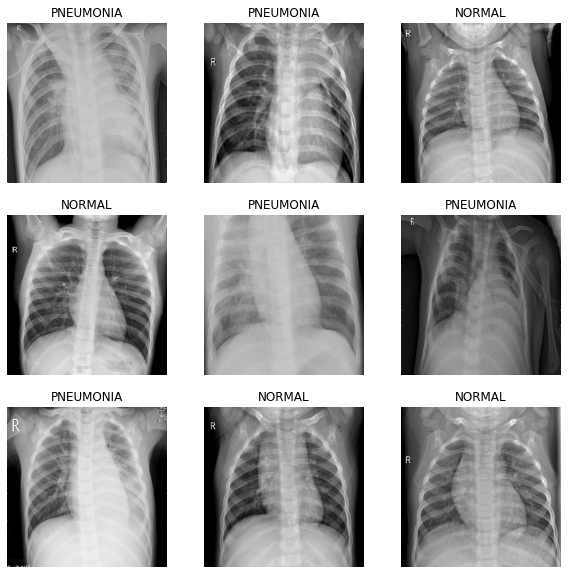

In [6]:
test_ds=tf.keras.utils.image_dataset_from_directory(test_set, image_size=(200,200))
train_ds=tf.keras.utils.image_dataset_from_directory(train_set)
val_ds=tf.keras.utils.image_dataset_from_directory(val_set)

class_names=train_ds.class_names
img_size=(1857,1317)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [7]:
normalization_layer=tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes=2

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])


model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history=model.fit(
  normalized_ds,
  validation_data=val_ds,
  epochs=3
)
model.summary() 


Epoch 1/3
163/163 [==============================] - 142s 859ms/step - loss: 0.3759 - accuracy: 0.9114 - val_loss: 19.8041 - val_accuracy: 0.8125
Epoch 2/3
163/163 [==============================] - 131s 787ms/step - loss: 0.0850 - accuracy: 0.9697 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
163/163 [==============================] - 145s 858ms/step - loss: 0.0531 - accuracy: 0.9812 - val_loss: 34.9210 - val_accuracy: 0.8750
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
           

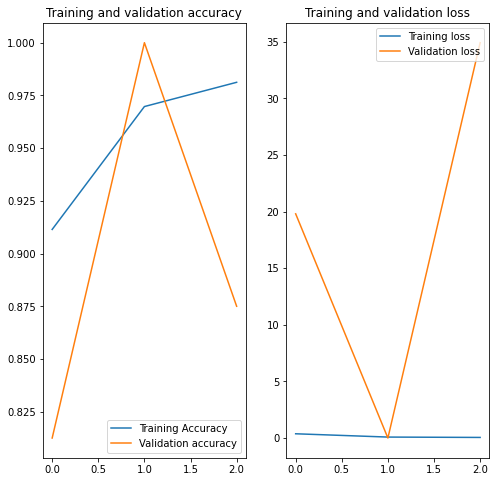

In [9]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(3)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label='Training Accuracy')
plt.plot(epochs_range,val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range,val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

In [10]:
def testimage() :
    for image, label in test_ds.take(1):
        image=images[i].numpy().astype("uint8")
        label=class_names[labels[i]]
        return image, label
    
img, label=testimage()
img=img/255
im2=tf.expand_dims(img, axis=0)
prediction=model.predict(im2)
print(prediction[0])

[1.0984521 0.8009592]


In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

jupyter nbextension enable --py widgetsnbextension

def f(x):
    return x

interact(f, x=(0,20))



SyntaxError: invalid syntax (<ipython-input-9-5ab7f0efb374>, line 5)